### Part 4: Shopping List Comparison and Analysis

#### Introduction
This section focuses on analyzing and comparing food recommendations generated from multiple sources, including algorithm-based recommendations (Step 7) and GPT-based recommendations, against the original shopping list. The goal is to evaluate the effectiveness of different recommendation methods in promoting healthier choices. By integrating data merging, statistical analysis, and visualization techniques, we aim to provide insights into the health impacts of various recommendation approaches.

#### Key Points:
- **Data Integration**:
  - Combine the original shopping list with algorithmic and GPT-based recommendations.
  - Merge all datasets with precomputed nutritional scores (e.g., FSANZ, NOVA) to enable health-focused comparisons.

- **Score Calculation**:
  - Match food items across lists with the Open Food Facts nutritional score database.
  - For items without direct matches, explore alternatives using predefined similarity thresholds or extrapolation.

- **Analysis and Comparison**:
  - Perform descriptive statistical analysis to understand the distribution of health scores across lists.
  - Use hypothesis testing (e.g., ANOVA) to determine whether significant differences exist between the original, algorithm-based, and GPT-based recommendations.

- **Visualization**:
  - Create bar plots, box plots, and histograms to illustrate the differences in health scores across the three lists.
  - Highlight trends and patterns across categories, countries, or store types.

#### Implementation Goals:
- Establish a clear workflow to integrate, analyze, and visualize data from multiple recommendation methods.
- Provide actionable insights into the nutritional improvements (or lack thereof) achieved by algorithmic and GPT-based recommendations.
- Ensure statistical rigor through hypothesis testing and robust analysis techniques.

#### Challenges:
- Merging datasets with incomplete or missing data while ensuring consistency.
- Handling edge cases where food items lack direct matches in the nutritional score database.
- Interpreting statistical results in a meaningful and actionable way.

By combining data integration, statistical analysis, and visualization, this step aims to provide a comprehensive evaluation of the impact of recommendation methods, guiding further improvements in personalized food recommendation systems.


### Imported Libraries and Dependencies

#### Data Handling and Preprocessing
- `numpy`, `pandas`: Essential libraries for handling numerical data and structured datasets.
- `matplotlib.pyplot`, `seaborn`: Visualization libraries to generate plots and charts for data analysis.
- `warnings`: Used to suppress unnecessary warnings during execution.

#### Machine Learning Models and Utilities
- `sklearn.preprocessing.StandardScaler`: Scales numeric data for uniformity.
- `sklearn.model_selection`: Includes tools like `train_test_split` and `cross_val_score` for model evaluation.

#### Statistical Analysis and Hypothesis Testing
- `scipy.stats`: Provides tools for conducting statistical tests, including ANOVA for hypothesis testing.
- `statsmodels`: Advanced statistical modeling and tests for verifying relationships in data.


#### Data Merging and Cleaning
- `pandas.merge`: Facilitates joining datasets, crucial for combining original shopping lists, recommendations, and health score datasets.
- `numpy`:Handles missing data and numerical operations efficiently.

#### Visualization
- `matplotlib.pyplot``seaborn`: Bar plots: To compare average scores between different lists.
Box plots: To observe distributions and outliers.
Histograms: To illustrate frequency distributions of health scores.

#### Additional Utilities
- `gc`: Manages memory usage during data processing.
- `random`: For shuffling datasets or creating random samples during testing.

### Summary
The libraries imported in Step 8 serve the following purposes:
- **Data Integration**: Combine multiple datasets (original shopping list, algorithm recommendations, GPT recommendations) with health scores.
- **Statistical Analysis**: Perform descriptive analysis and hypothesis testing to evaluate the impact of recommendations.
- **Visualization**: Present results in an understandable manner using charts and graphs.

These tools ensure the robustness, scalability, and clarity of the analysis process, aligning with the goal of Step 8 to evaluate and compare recommendation methods.

In [ ]:
# Essential Libraries for Data Handling and Preprocessing
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings("ignore")  # Suppress unnecessary warnings

# Statistical Analysis and Hypothesis Testing
from scipy.stats import f_oneway  # For ANOVA
from statsmodels.api import OLS

# Machine Learning Utilities
from sklearn.preprocessing import StandardScaler  # For scaling data

# Data Visualization
import matplotlib.pyplot as plt
import seaborn as sns

# Memory Management and Utilities
import gc
import random

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


### Data Loading and Initialization

1. **Food Product Data (`food_fact_df`)**:  
   - A CSV file containing detailed information about various food products, including features such as nutritional values, NOVA score, and health category.

2. **Text Embeddings (`emb_text`)**:  
   - Precomputed embeddings representing food product names. These are loaded from a `.npz` file and stored as a NumPy array (`emb_text_array`).

3. **Ingredient Embeddings (`emb_ingred`)**:  
   - Precomputed embeddings for food product ingredients, also loaded from a `.npz` file and stored as a NumPy array (`emb_ingred_array`).

4. **Shopping List (`shopping_list`)**:  
   - A CSV file representing a user's shopping list, containing product codes and other relevant details.

5. **Indexing for Reference**:  
   - The `food_fact_df` is reset with an added `original_index` column to track items after transformations like splitting or filtering.  
   - The `original_indices` array stores these indices for later use.


In [ ]:
# Load the food product details with health scores
food_fact_df = pd.read_csv('drive/MyDrive/Colab Notebooks/data/food_fact_withUnhealthScore_withNOVA_withCategory.csv')

# Load the three list files
shopping_list_file = 'drive/MyDrive/Colab Notebooks/data/random_shopping_lists(20_2-10).csv'
recommend_list_file = 'drive/MyDrive/Colab Notebooks/data/recommended_shopping_lists(20_2-10)_combined_scores.csv'
gpt_list_file = 'drive/MyDrive/Colab Notebooks/data/GPT_shopping_lists(20_2-10).csv'

# Read the files
shopping_list_df = pd.read_csv(shopping_list_file)
recommend_list_df = pd.read_csv(recommend_list_file)
gpt_list_df = pd.read_csv(gpt_list_file)

# Parse the `product_ids` column into a proper list format for each file
shopping_list_df['product_ids'] = shopping_list_df['product_ids'].apply(eval)
recommend_list_df['product_ids'] = recommend_list_df['product_ids'].apply(eval)
gpt_list_df['product_ids'] = gpt_list_df['product_ids'].apply(eval)

# Flatten all product IDs into a single list for filtering the food_fact_df
shopping_product_ids = [item for sublist in shopping_list_df['product_ids'] for item in sublist]
recommend_product_ids = [item for sublist in recommend_list_df['product_ids'] for item in sublist]
gpt_product_ids = [item for sublist in gpt_list_df['product_ids'] for item in sublist]

### Conduct statistical analysis

1. **Generate the health scores (e.g., FSANZ, NOVA, nutrition-score-fr)**:  
   - extracted and computed average health scores (FSANZ-hgl, NOVA-hgl, and nutrition-score-fr) for the original shopping list, algorithm-recommended alternatives, and GPT-based recommendations.

2. **Quantify improvements in healthiness and validate effectiveness:**:  
   - calculating and comparing mean scores across the three lists, we’ve provided evidence of potential improvements in healthiness (e.g., whether recommend or GPT lists yield better nutrition-score-fr than the original).

3. **Perform hypothesis testing:**:  
   - conducted a 1-way ANOVA and t-test to statistically compare the health scores across the three groups (Shopping, Recommendation, and GPT).
   - output includes an F-statistic and p-value, showing whether the differences in health scores are significant.

4. **Define null and alternative hypotheses**:  
   - Null Hypothesis (H₀): The means of the health scores across the three groups are equal.
   - Alternative Hypothesis (H₁): At least one group's mean health score is significantly different.

5. **Results**:  
   - results (a very low p-value) allowed us to reject the null hypothesis, demonstrating statistically significant differences in health scores.


In [ ]:
# Filter the food_fact_df for relevant product IDs
def get_list_data(product_ids, food_fact_df):
    product_ids = list(map(str, product_ids))  # Ensure all IDs are strings for consistency
    food_fact_df['code'] = food_fact_df['code'].astype(str)
    return food_fact_df[food_fact_df['code'].isin(product_ids)].copy()

shopping_list_products = get_list_data(shopping_product_ids, food_fact_df)
recommend_list_products = get_list_data(recommend_product_ids, food_fact_df)
gpt_list_products = get_list_data(gpt_product_ids, food_fact_df)

# Ensure the lists contain the required columns
required_columns = ['code', 'product_name', 'FSANZ-hgl', 'NOVA-hgl', 'nutrition-score-fr']
for df in [shopping_list_products, recommend_list_products, gpt_list_products]:
    assert all(col in df.columns for col in required_columns), "Missing required columns in data."

# Calculate descriptive statistics for each list
print("Shopping List Average Scores:")
print(shopping_list_products[['FSANZ-hgl', 'NOVA-hgl', 'nutrition-score-fr']].mean())

print("Algorithm Recommendations Average Scores:")
print(recommend_list_products[['FSANZ-hgl', 'NOVA-hgl', 'nutrition-score-fr']].mean())

print("GPT Recommendations Average Scores:")
print(gpt_list_products[['FSANZ-hgl', 'NOVA-hgl', 'nutrition-score-fr']].mean())

# Perform ANOVA to compare the health scores across the three lists
anova_result = f_oneway(
    shopping_list_products['nutrition-score-fr'].dropna(),
    recommend_list_products['nutrition-score-fr'].dropna(),
    gpt_list_products['nutrition-score-fr'].dropna()
)
print(f"ANOVA Result - F-statistic: {anova_result.statistic}, p-value: {anova_result.pvalue}")

from scipy.stats import ttest_ind

# Perform pairwise t-tests for `nutrition-score-fr`
t_test_results = {
    "Original vs GPT": ttest_ind(
        shopping_list_products['nutrition-score-fr'].dropna(),
        gpt_list_products['nutrition-score-fr'].dropna(),
        equal_var=False  # Welch's t-test
    ),
    "Original vs Algorithm": ttest_ind(
        shopping_list_products['nutrition-score-fr'].dropna(),
        recommend_list_products['nutrition-score-fr'].dropna(),
        equal_var=False  # Welch's t-test
    ),
    "GPT vs Algorithm": ttest_ind(
        gpt_list_products['nutrition-score-fr'].dropna(),
        recommend_list_products['nutrition-score-fr'].dropna(),
        equal_var=False  # Welch's t-test
    )
}

# Print the t-test results
for comparison, result in t_test_results.items():
    print(f"{comparison}:")
    print(f"  t-statistic: {result.statistic:.4f}")
    print(f"  p-value: {result.pvalue:.4e}\n")




Shopping List Average Scores:
FSANZ-hgl             2.491316
NOVA-hgl              3.289474
nutrition-score-fr    7.175439
dtype: float64
Algorithm Recommendations Average Scores:
FSANZ-hgl            -13.664915
NOVA-hgl               2.215686
nutrition-score-fr    -4.941176
dtype: float64
GPT Recommendations Average Scores:
FSANZ-hgl            -9.540014
NOVA-hgl              2.647059
nutrition-score-fr   -3.823529
dtype: float64
ANOVA Result - F-statistic: 59.68428799699568, p-value: 2.6296770135878704e-21
Original vs GPT:
  t-statistic: 9.2374
  p-value: 3.2171e-16

Original vs Algorithm:
  t-statistic: 10.2798
  p-value: 5.9115e-19

GPT vs Algorithm:
  t-statistic: 0.9676
  p-value: 3.3558e-01




 **Visualization**:  
   - Visualize the health score differences (e.g., bar plots, grouped box plots).


Average Health Scores for Each Recommendation Source:
                    Original  Algorithm       GPT
FSANZ-hgl           2.491316 -13.664915 -9.540014
NOVA-hgl            3.289474   2.215686  2.647059
nutrition-score-fr  7.175439  -4.941176 -3.823529


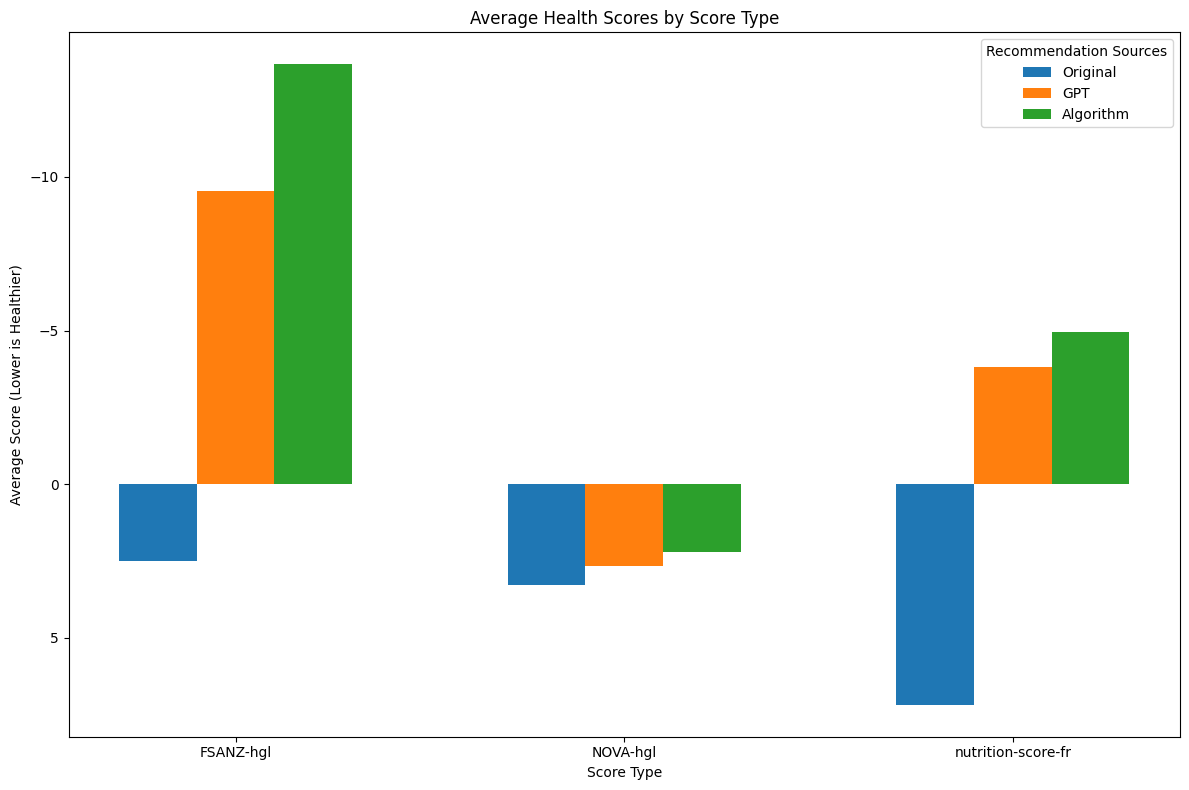

<Figure size 1500x1200 with 0 Axes>

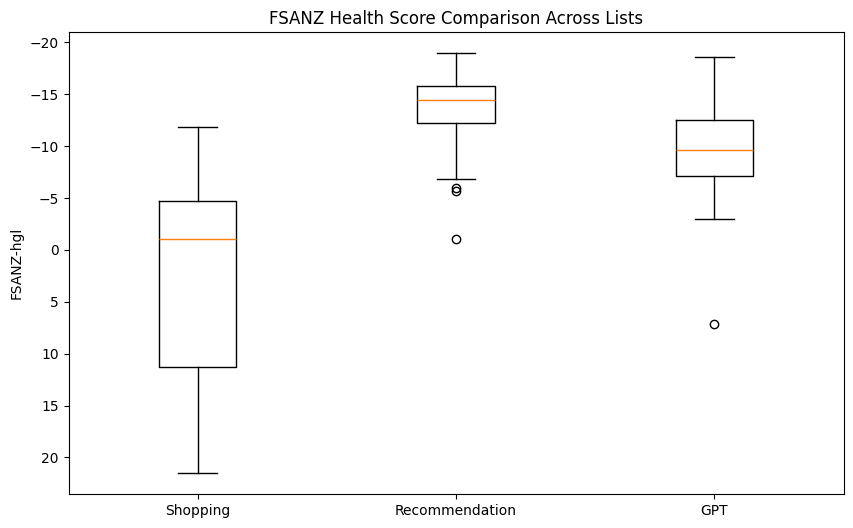

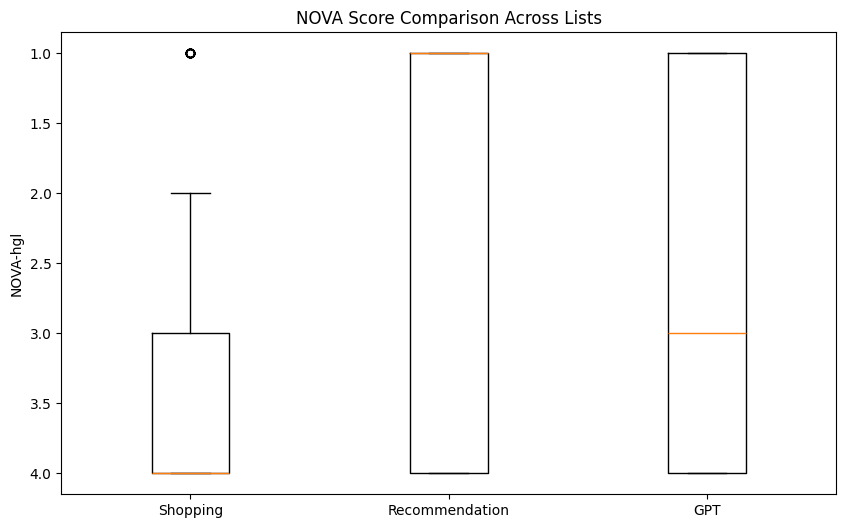

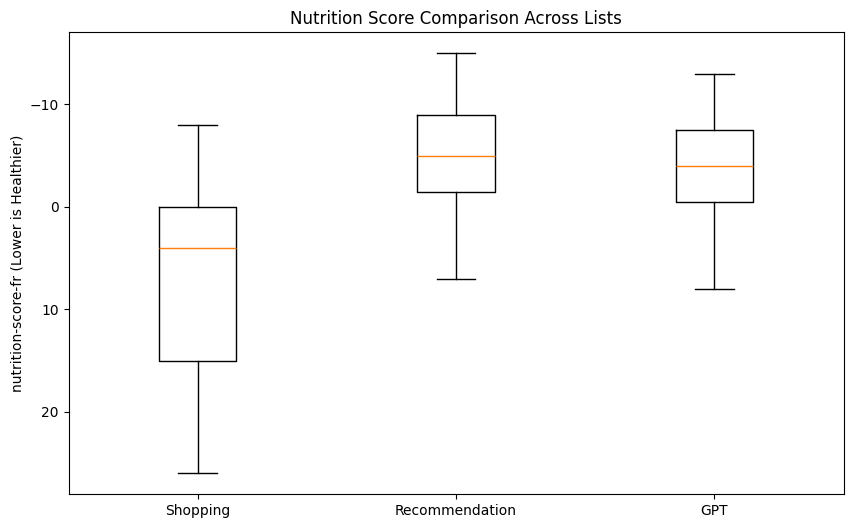

In [ ]:
# Average Health Scores Comparison
avg_health_scores = {
    'Original': shopping_list_products[['FSANZ-hgl', 'NOVA-hgl', 'nutrition-score-fr']].mean(),
    'Algorithm': recommend_list_products[['FSANZ-hgl', 'NOVA-hgl', 'nutrition-score-fr']].mean(),
    'GPT': gpt_list_products[['FSANZ-hgl', 'NOVA-hgl', 'nutrition-score-fr']].mean()
}
avg_health_df = pd.DataFrame(avg_health_scores)

print("Average Health Scores for Each Recommendation Source:")
print(avg_health_df)

# Prepare data for a grouped bar chart
categories = avg_health_df.index  # Score types (e.g., FSANZ-hgl, NOVA-hgl, etc.)
x = range(len(categories))  # Index for score types
width = 0.2  # Width of each bar

# Plot grouped bar chart
plt.figure(figsize=(12, 8))

# Add bars for each recommendation source
plt.bar([i - width for i in x], avg_health_df['Original'], width=width, label='Original')
plt.bar(x, avg_health_df['GPT'], width=width, label='GPT')
plt.bar([i + width for i in x], avg_health_df['Algorithm'], width=width, label='Algorithm')

# Chart labels and formatting
plt.title('Average Health Scores by Score Type')
plt.xlabel('Score Type')
plt.ylabel('Average Score (Lower is Healthier)')
plt.xticks(x, categories, rotation=0)  # Set x-axis labels to score types
plt.legend(title="Recommendation Sources")
plt.gca().invert_yaxis()  # Invert Y-axis for healthiness comparison
plt.tight_layout()

# Show the plot
plt.show()

# Visualization: Separate box plots for each score type
score_types = ['FSANZ-hgl', 'NOVA-hgl', 'nutrition-score-fr']
titles = [
    'FSANZ Health Score Comparison Across Lists',
    'NOVA Score Comparison Across Lists',
    'Nutrition Score Comparison Across Lists'
]

plt.figure(figsize=(15, 12))  # Adjust size to accommodate multiple plots

for i, score in enumerate(score_types):
    plt.figure(figsize=(10, 6))
    data_to_plot = [
        shopping_list_products[score].dropna(),
        recommend_list_products[score].dropna(),
        gpt_list_products[score].dropna()
    ]
    plt.boxplot(data_to_plot, labels=['Shopping', 'Recommendation', 'GPT'])
    plt.title(titles[i])
    plt.ylabel(f'{score} (Lower is Healthier)' if score == 'nutrition-score-fr' else f'{score}')
    plt.gca().invert_yaxis()  # Invert Y-axis
    plt.show()


### Consistency Evaluation

1. **Test algorithm performance across different product categories (e.g., beverages, snacks):**:  
   - Group products by categories (using the TRA-hgl column).
   - Calculate average health scores within each category for the three lists.
2. **Examine variations across data groups**:  
   - Group products by country, brand, or other categorical features.
   - Perform similar calculations for health scores and compare across lists.

Category-Wise Health Scores:
    Category  Original_Nutrition  GPT_Nutrition  Algorithm_Nutrition  \
0       14.0            3.750000      -5.000000            -4.250000   
1       18.0            7.714286      -1.333333            -2.333333   
2        4.0           15.714286      -1.833333            -2.500000   
3        2.0            1.200000     -10.000000           -10.000000   
4        5.0           15.500000      -1.000000            -3.666667   
5       19.0            7.000000      -1.000000            -2.500000   
6        1.0           11.166667      -5.750000            -5.500000   
7       21.0           10.666667      -9.000000           -11.000000   
8       20.0            1.000000      -6.000000            -6.000000   
9        3.0            0.250000      -4.000000            -4.800000   
10       8.0           19.666667       3.666667             0.333333   
11      12.0            7.600000      -2.250000            -5.750000   
12       9.0            1.400000   

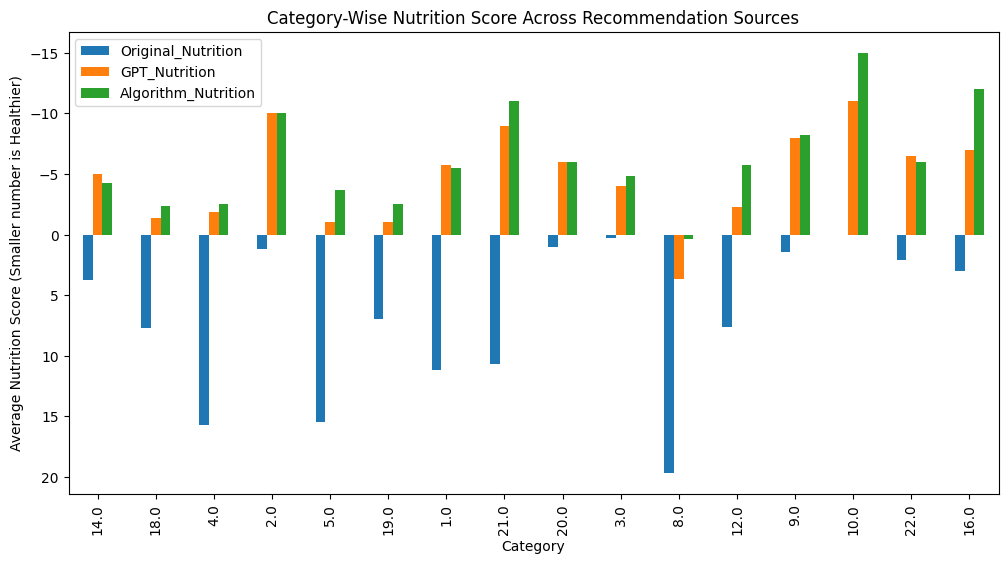

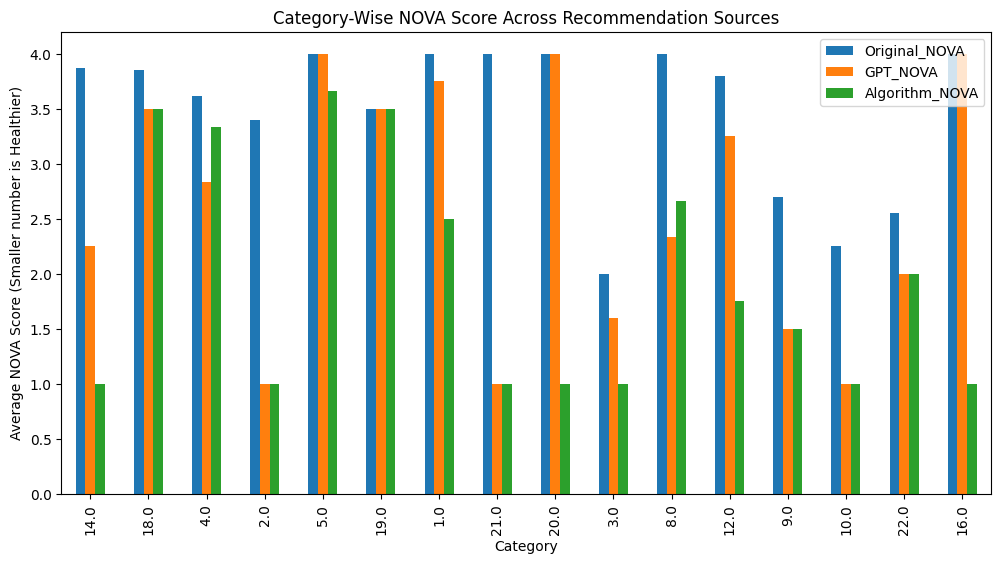

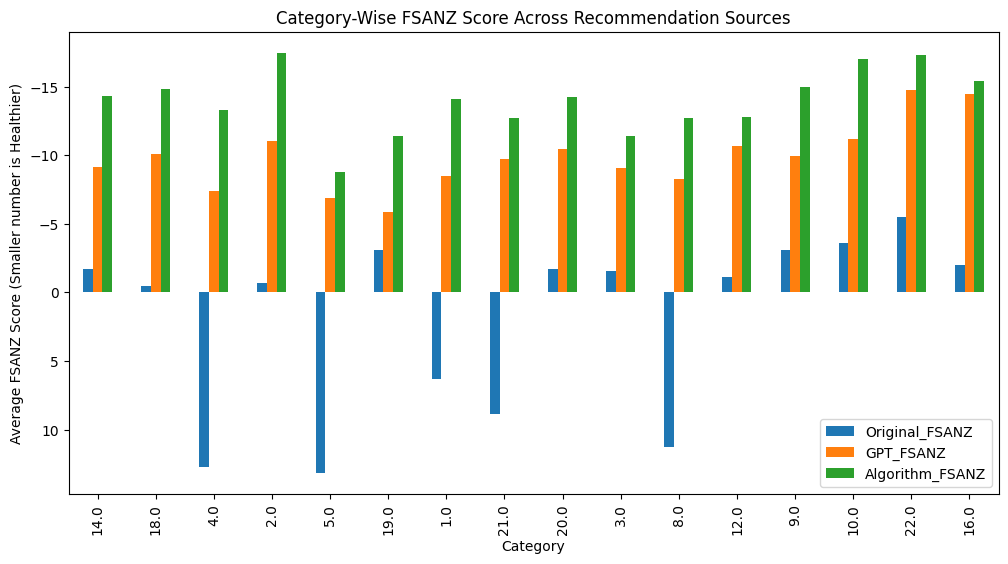

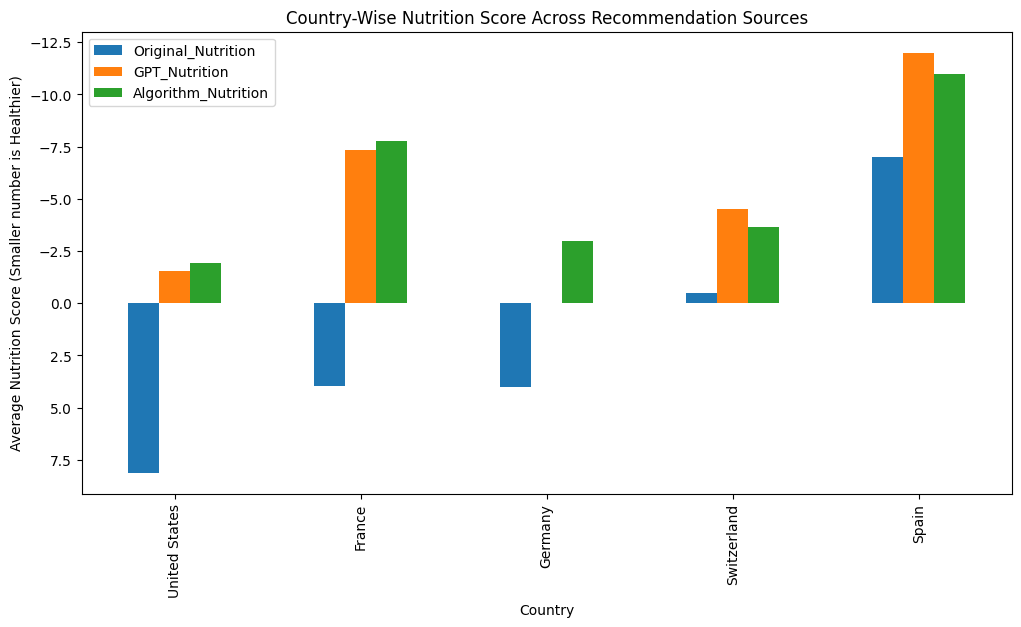

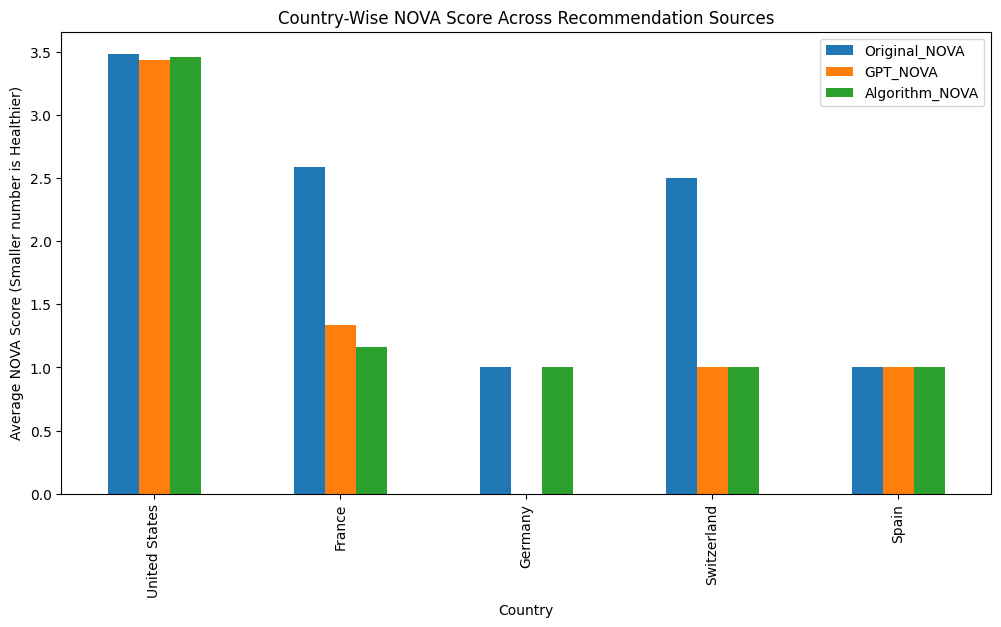

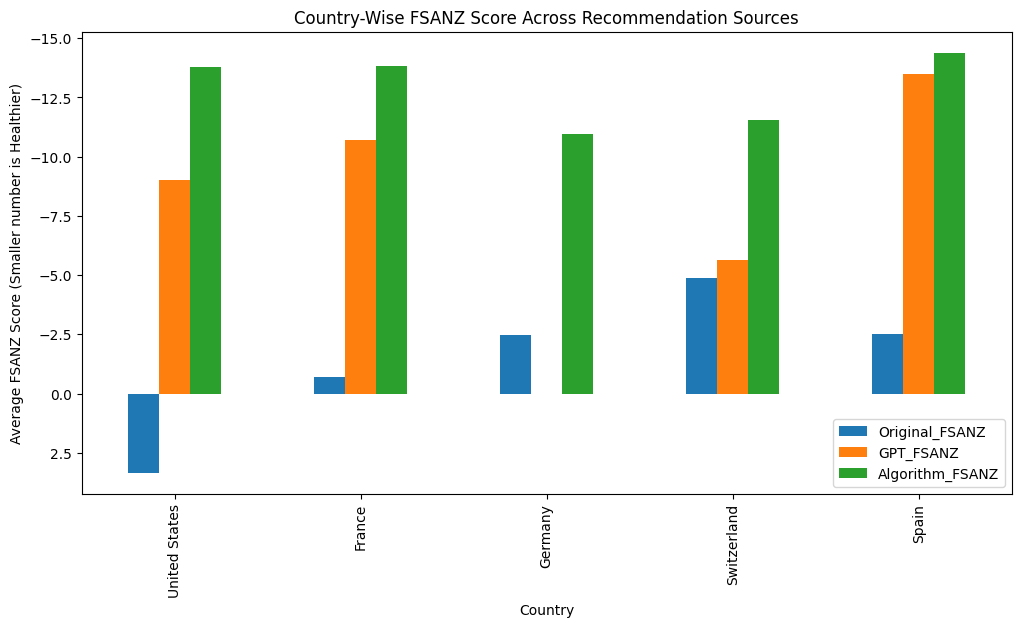

In [ ]:
# Initialize empty lists for each group type
category_scores = []
country_scores = []

# Consistency Across Product Categories
category_column = 'TRA-hgl'  # Replace with actual category column if different
for category in shopping_list_products[category_column].unique():
    original_avg = shopping_list_products[shopping_list_products[category_column] == category][['nutrition-score-fr', 'NOVA-hgl', 'FSANZ-hgl']].mean()
    gpt_avg = gpt_list_products[gpt_list_products[category_column] == category][['nutrition-score-fr', 'NOVA-hgl', 'FSANZ-hgl']].mean()
    algo_avg = recommend_list_products[recommend_list_products[category_column] == category][['nutrition-score-fr', 'NOVA-hgl', 'FSANZ-hgl']].mean()

    category_scores.append({
        'Category': category,
        'Original_Nutrition': original_avg['nutrition-score-fr'],
        'GPT_Nutrition': gpt_avg['nutrition-score-fr'],
        'Algorithm_Nutrition': algo_avg['nutrition-score-fr'],
        'Original_NOVA': original_avg['NOVA-hgl'],
        'GPT_NOVA': gpt_avg['NOVA-hgl'],
        'Algorithm_NOVA': algo_avg['NOVA-hgl'],
        'Original_FSANZ': original_avg['FSANZ-hgl'],
        'GPT_FSANZ': gpt_avg['FSANZ-hgl'],
        'Algorithm_FSANZ': algo_avg['FSANZ-hgl']
    })

# Consistency Across Countries
country_column = 'country'  # Replace with actual country column if different
for country in shopping_list_products[country_column].unique():
    original_avg = shopping_list_products[shopping_list_products[country_column] == country][['nutrition-score-fr', 'NOVA-hgl', 'FSANZ-hgl']].mean()
    gpt_avg = gpt_list_products[gpt_list_products[country_column] == country][['nutrition-score-fr', 'NOVA-hgl', 'FSANZ-hgl']].mean()
    algo_avg = recommend_list_products[recommend_list_products[country_column] == country][['nutrition-score-fr', 'NOVA-hgl', 'FSANZ-hgl']].mean()

    country_scores.append({
        'Country': country,
        'Original_Nutrition': original_avg['nutrition-score-fr'],
        'GPT_Nutrition': gpt_avg['nutrition-score-fr'],
        'Algorithm_Nutrition': algo_avg['nutrition-score-fr'],
        'Original_NOVA': original_avg['NOVA-hgl'],
        'GPT_NOVA': gpt_avg['NOVA-hgl'],
        'Algorithm_NOVA': algo_avg['NOVA-hgl'],
        'Original_FSANZ': original_avg['FSANZ-hgl'],
        'GPT_FSANZ': gpt_avg['FSANZ-hgl'],
        'Algorithm_FSANZ': algo_avg['FSANZ-hgl']
    })

# Convert lists to DataFrames
category_scores_df = pd.DataFrame(category_scores)
country_scores_df = pd.DataFrame(country_scores)

# Print the results
print("Category-Wise Health Scores:")
print(category_scores_df)

print("Country-Wise Health Scores:")
print(country_scores_df)

# Visualization: Grouped Bar Plots
# Categories
for metric, title in zip(['Nutrition', 'NOVA', 'FSANZ'],
                         ['Nutrition Score', 'NOVA Score', 'FSANZ Score']):
    metric_columns = [f'Original_{metric}', f'GPT_{metric}', f'Algorithm_{metric}']
    category_scores_df.set_index('Category')[metric_columns].plot(kind='bar', figsize=(12, 6), legend=True)
    plt.title(f'Category-Wise {title} Across Recommendation Sources')
    plt.ylabel(f'Average {title} (Smaller number is Healthier)')
    if metric != 'NOVA':  # Invert Y-axis for Nutrition and FSANZ
        plt.gca().invert_yaxis()
    plt.show()

# Countries
for metric, title in zip(['Nutrition', 'NOVA', 'FSANZ'],
                         ['Nutrition Score', 'NOVA Score', 'FSANZ Score']):
    metric_columns = [f'Original_{metric}', f'GPT_{metric}', f'Algorithm_{metric}']
    country_scores_df.set_index('Country')[metric_columns].plot(kind='bar', figsize=(12, 6), legend=True)
    plt.title(f'Country-Wise {title} Across Recommendation Sources')
    plt.ylabel(f'Average {title} (Smaller number is Healthier)')
    if metric != 'NOVA':  # Invert Y-axis for Nutrition and FSANZ
        plt.gca().invert_yaxis()
    plt.show()


### Addtional group Consistency Evaluation


**Examine variations across additional data groups**:  
   - Group products by sugar, fat,serving size, or other categorical features.
   - Perform similar calculations for health scores and compare across lists.

Group-Wise Health Scores (Sugar, Fat, Serving Size):
           Group       Bin  Original_Nutrition  GPT_Nutrition  \
0          Sugar       <5g            4.692308      -5.566667   
1          Sugar     5-10g            6.400000      -3.666667   
2          Sugar    10-20g            6.461538       1.000000   
3          Sugar    20-50g           16.666667            NaN   
4          Sugar      >50g                 NaN            NaN   
5            Fat       <5g            0.441176      -7.240000   
6            Fat     5-10g            3.652174      -2.000000   
7            Fat    10-20g           15.529412       2.000000   
8            Fat    20-50g           18.636364       2.000000   
9            Fat      >50g           26.000000            NaN   
10  Serving Size      <50g           13.547619       0.476190   
11  Serving Size   50-100g            4.071429      -6.538462   
12  Serving Size  100-200g            3.580645      -7.833333   
13  Serving Size  200-500g           

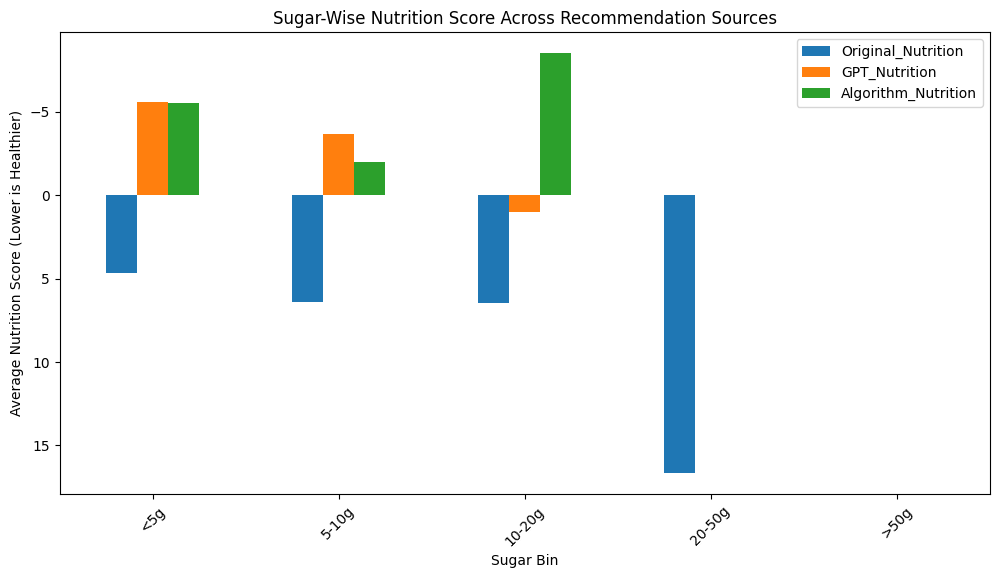

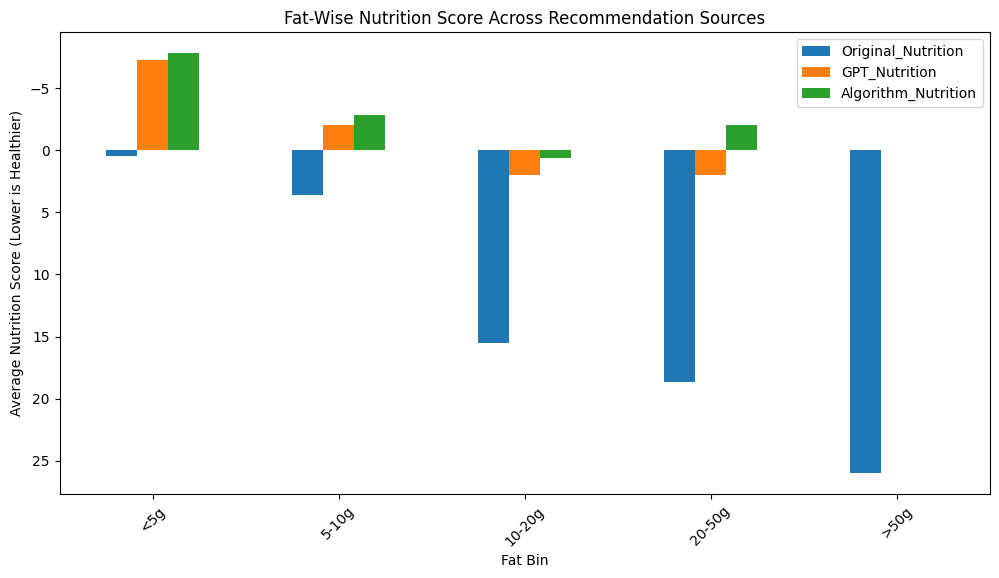

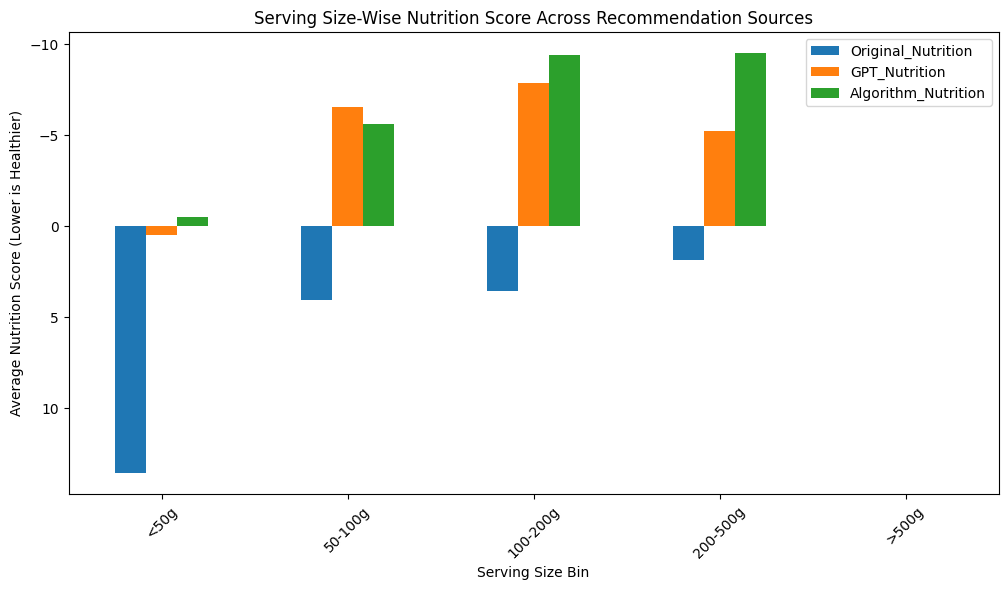

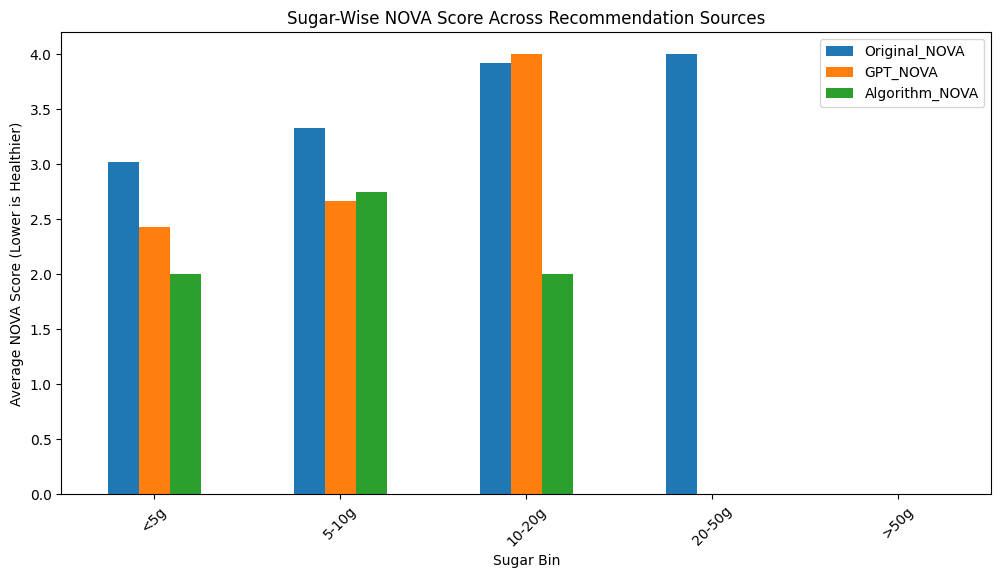

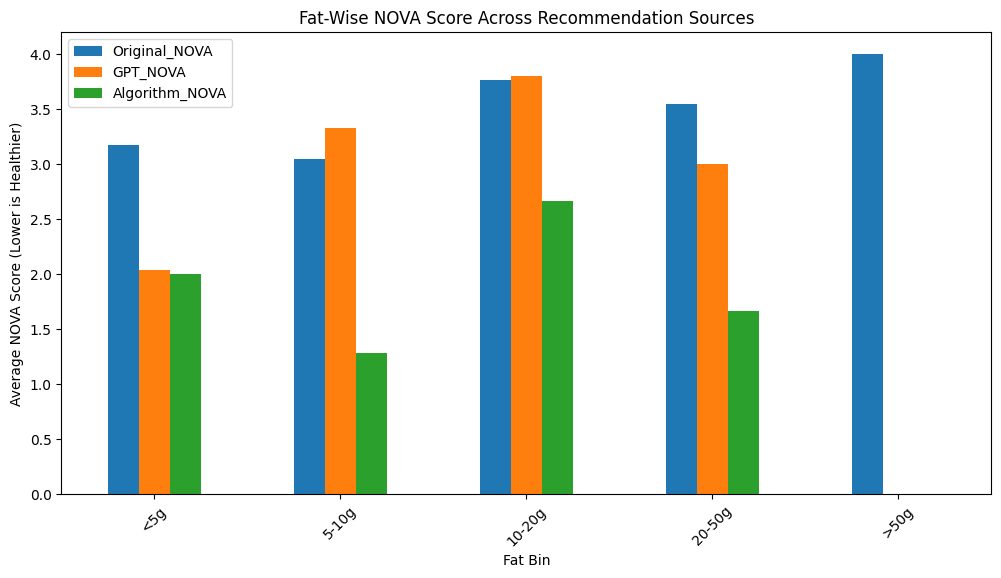

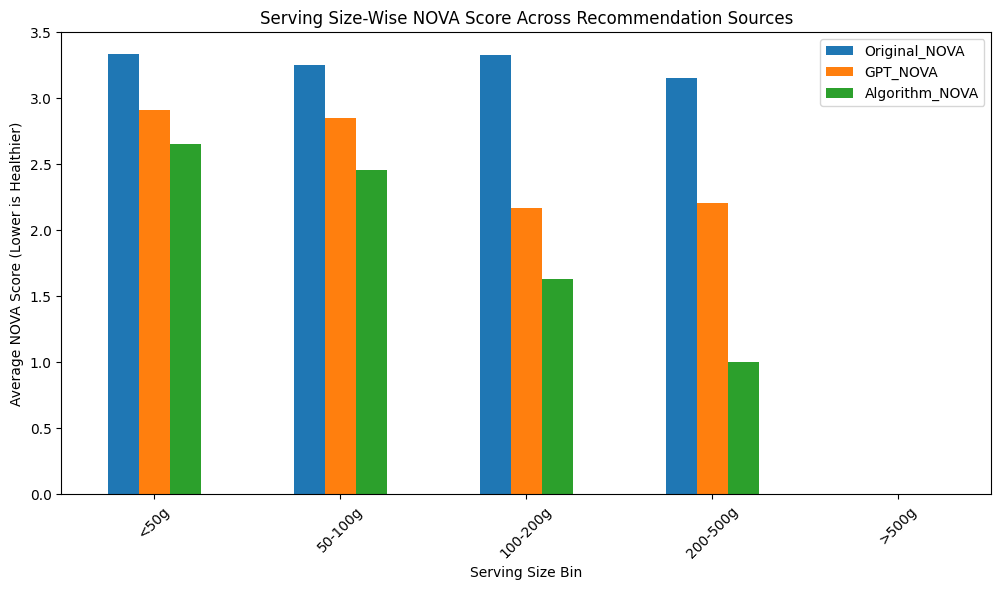

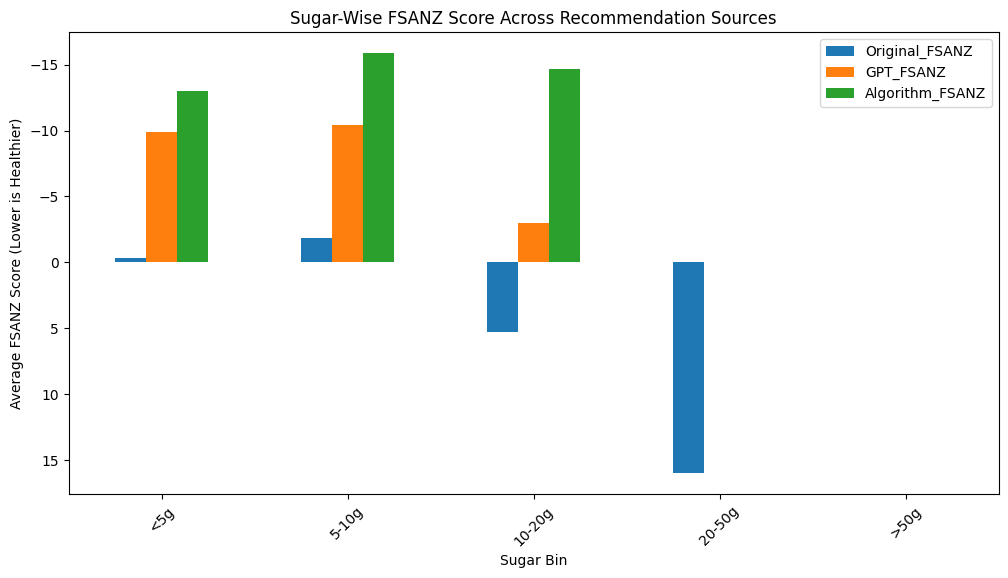

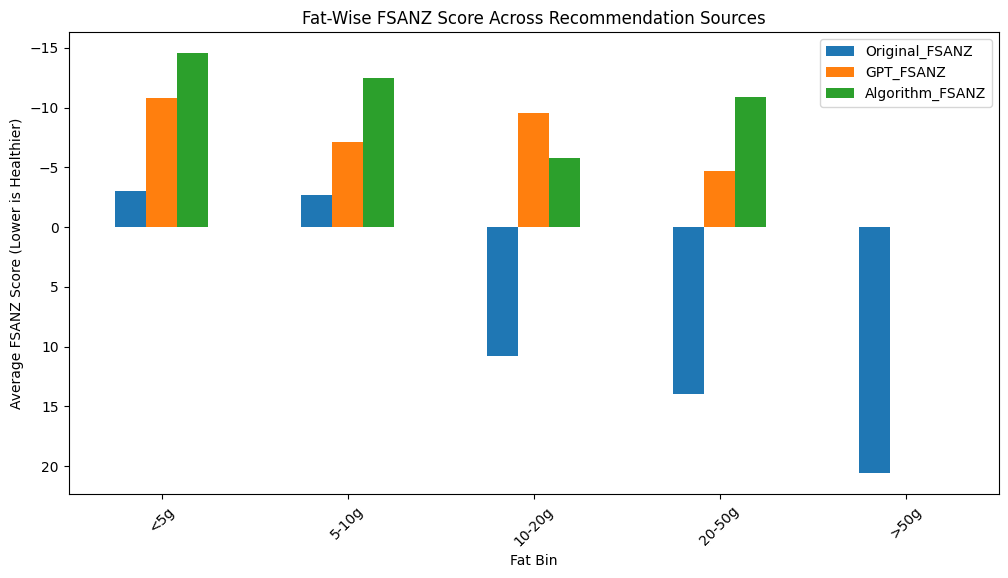

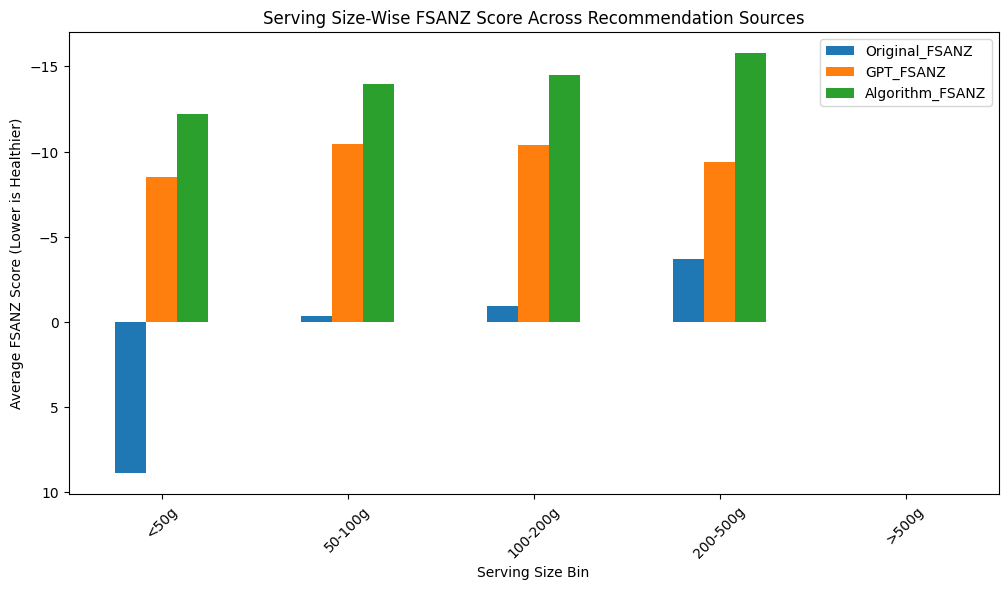

In [ ]:
# Initialize empty list for group comparisons
group_scores = []

# Define bins for sugar, fat, and serving sizes
sugar_column = 'sugars'
fat_column = 'fat'
serving_size_column = 'serving_size_numeric'

# Define bins and labels for analysis
bins = [0, 5, 10, 20, 50, 100]  # Adjust bins as needed
labels = ['<5g', '5-10g', '10-20g', '20-50g', '>50g']

# Bin the data for sugar
shopping_list_products['sugar_bin'] = pd.cut(shopping_list_products[sugar_column], bins=bins, labels=labels)
gpt_list_products['sugar_bin'] = pd.cut(gpt_list_products[sugar_column], bins=bins, labels=labels)
recommend_list_products['sugar_bin'] = pd.cut(recommend_list_products[sugar_column], bins=bins, labels=labels)

# Bin the data for fat
shopping_list_products['fat_bin'] = pd.cut(shopping_list_products[fat_column], bins=bins, labels=labels)
gpt_list_products['fat_bin'] = pd.cut(gpt_list_products[fat_column], bins=bins, labels=labels)
recommend_list_products['fat_bin'] = pd.cut(recommend_list_products[fat_column], bins=bins, labels=labels)

# Bin the data for serving sizes
bins_serving = [0, 50, 100, 200, 500, 1000]  # Adjust bins as needed
labels_serving = ['<50g', '50-100g', '100-200g', '200-500g', '>500g']
shopping_list_products['serving_size_bin'] = pd.cut(shopping_list_products[serving_size_column], bins=bins_serving, labels=labels_serving)
gpt_list_products['serving_size_bin'] = pd.cut(gpt_list_products[serving_size_column], bins=bins_serving, labels=labels_serving)
recommend_list_products['serving_size_bin'] = pd.cut(recommend_list_products[serving_size_column], bins=bins_serving, labels=labels_serving)

# Compare scores for each bin (sugar, fat, serving size)
for group_column, group_label in zip(
    ['sugar_bin', 'fat_bin', 'serving_size_bin'],
    ['Sugar', 'Fat', 'Serving Size']
):
    for bin_label in shopping_list_products[group_column].cat.categories:  # Iterate over bin labels
        original_avg = shopping_list_products[shopping_list_products[group_column] == bin_label][['nutrition-score-fr', 'NOVA-hgl', 'FSANZ-hgl']].mean()
        gpt_avg = gpt_list_products[gpt_list_products[group_column] == bin_label][['nutrition-score-fr', 'NOVA-hgl', 'FSANZ-hgl']].mean()
        algo_avg = recommend_list_products[recommend_list_products[group_column] == bin_label][['nutrition-score-fr', 'NOVA-hgl', 'FSANZ-hgl']].mean()

        group_scores.append({
            'Group': group_label,
            'Bin': bin_label,
            'Original_Nutrition': original_avg['nutrition-score-fr'],
            'GPT_Nutrition': gpt_avg['nutrition-score-fr'],
            'Algorithm_Nutrition': algo_avg['nutrition-score-fr'],
            'Original_NOVA': original_avg['NOVA-hgl'],
            'GPT_NOVA': gpt_avg['NOVA-hgl'],
            'Algorithm_NOVA': algo_avg['NOVA-hgl'],
            'Original_FSANZ': original_avg['FSANZ-hgl'],
            'GPT_FSANZ': gpt_avg['FSANZ-hgl'],
            'Algorithm_FSANZ': algo_avg['FSANZ-hgl']
        })

# Convert list to DataFrame
group_scores_df = pd.DataFrame(group_scores)

# Print the results
print("Group-Wise Health Scores (Sugar, Fat, Serving Size):")
print(group_scores_df)

# Visualization: Grouped Bar Plots for each metric
for metric, title in zip(['Nutrition', 'NOVA', 'FSANZ'],
                         ['Nutrition Score', 'NOVA Score', 'FSANZ Score']):
    for group_label in ['Sugar', 'Fat', 'Serving Size']:
        subset_df = group_scores_df[group_scores_df['Group'] == group_label]
        metric_columns = [f'Original_{metric}', f'GPT_{metric}', f'Algorithm_{metric}']
        subset_df.set_index('Bin')[metric_columns].plot(kind='bar', figsize=(12, 6), legend=True)
        plt.title(f'{group_label}-Wise {title} Across Recommendation Sources')
        plt.ylabel(f'Average {title} (Lower is Healthier)')
        plt.xlabel(f'{group_label} Bin')
        if metric != 'NOVA':  # Invert Y-axis for Nutrition and FSANZ
            plt.gca().invert_yaxis()
        plt.xticks(rotation=45)
        plt.show()

